In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

1. Carregamento Dos Dados

In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")

Visualizando os arquivos CSV

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [ ]:
tags

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
87580,292731,26812510,1032473.0
87581,292737,14907358,986674.0
87582,292753,12388280,948139.0
87583,292755,64027,182776.0


2. Processamento (Agregação, Composições, Conversão de Tipo)

In [3]:
# 1. Agregação de Tags
tags_agregadas = tags.groupby('movieId')['tag'].apply(lambda x: ' | '.join(x.dropna().astype(str))).reset_index()

# 2. Junções
info_filmes = pd.merge(movies, links, on='movieId', how='left')
info_filmes_completa = pd.merge(info_filmes, tags_agregadas, on='movieId', how='left')
df_final = pd.merge(info_filmes_completa, ratings, on='movieId', how='inner')

# 3. Transformação de Tipo
df_final['rating'] = pd.to_numeric(df_final['rating'])
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], unit='s')

# 4. Adição de Atributos
df_final['year'] = df_final['timestamp'].dt.year
df_final['month'] = df_final['timestamp'].dt.month


Primeiras 5 linhas e ultimas 5 linhas e informações dos dados

In [ ]:
df_final. head()

,movieId,title,genres,imdbId,tmdbId,tag,userId,rating,timestamp,year,month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,children | Disney | animation | children | Dis...,10,2.5,2007-01-20 03:53:51,2007,1
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,children | Disney | animation | children | Dis...,11,3.0,1996-12-08 22:44:36,1996,12
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,children | Disney | animation | children | Dis...,17,4.0,2002-07-22 02:42:31,2002,7
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,children | Disney | animation | children | Dis...,19,3.0,2000-11-20 07:14:48,2000,11
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,children | Disney | animation | children | Dis...,20,5.0,2019-03-21 16:03:50,2019,3


In [ ]:
df_final.tail()

,movieId,title,genres,imdbId,tmdbId,tag,userId,rating,timestamp,year,month
32000199,292731,The Monroy Affaire (2022),Drama,26812510,1032473.0,NaN,50685,4.0,2023-10-12 01:39:39,2023,10
32000200,292737,Shelter in Solitude (2023),Comedy|Drama,14907358,986674.0,NaN,165364,1.5,2023-10-12 21:25:47,2023,10
32000201,292753,Orca (2023),Drama,12388280,948139.0,NaN,150812,4.0,2023-10-12 19:55:30,2023,10
32000202,292755,The Angry Breed (1968),Drama,64027,182776.0,NaN,91097,1.0,2023-10-12 21:08:48,2023,10
32000203,292757,Race to the Summit (2023),Action|Adventure|Documentary,28995566,1174725.0,NaN,171418,3.5,2023-10-12 22:21:28,2023,10


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 11 columns):
 #   Column     Dtype         
---  ------     -----         
 0   movieId    int64         
 1   title      object        
 2   genres     object        
 3   imdbId     int64         
 4   tmdbId     float64       
 5   tag        object        
 6   userId     int64         
 7   rating     float64       
 8   timestamp  datetime64[ns]
 9   year       int32         
 10  month      int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(3)
memory usage: 2.4+ GB


Valores nulos por coluna

In [ ]:
df_final.isna().sum()

movieId           0
title             0
genres            0
imdbId            0
tmdbId         4726
tag          175367
userId            0
rating            0
timestamp         0
year              0
month             0
dtype: int64

Valores duplicados por coluna

In [4]:
duplicadas = df_final.duplicated().sum()

In [5]:
if duplicadas > 0:
    df_final = df_final.drop_duplicates()
    print("Linhas duplicadas foram removidas.")

Visualizando Dados Faltantes


In [ ]:
tag_faltante = df_final[df_final['tag'].isnull()]
tag_faltante

,movieId,title,genres,imdbId,tmdbId,tag,userId,rating,timestamp,year,month
750863,51,Guardian Angel (1994),Action|Drama|Thriller,109950,117164.0,NaN,1133,5.0,1997-03-05 16:32:20,1997,3
750864,51,Guardian Angel (1994),Action|Drama|Thriller,109950,117164.0,NaN,2535,2.0,1998-07-27 01:32:37,1998,7
750865,51,Guardian Angel (1994),Action|Drama|Thriller,109950,117164.0,NaN,22744,3.0,2019-12-09 18:41:15,2019,12
750866,51,Guardian Angel (1994),Action|Drama|Thriller,109950,117164.0,NaN,23635,3.0,2011-11-10 20:16:24,2011,11
750867,51,Guardian Angel (1994),Action|Drama|Thriller,109950,117164.0,NaN,26189,3.0,2008-08-24 07:56:03,2008,8
...,...,...,...,...,...,...,...,...,...,...,...
32000199,292731,The Monroy Affaire (2022),Drama,26812510,1032473.0,NaN,50685,4.0,2023-10-12 01:39:39,2023,10
32000200,292737,Shelter in Solitude (2023),Comedy|Drama,14907358,986674.0,NaN,165364,1.5,2023-10-12 21:25:47,2023,10
32000201,292753,Orca (2023),Drama,12388280,948139.0,NaN,150812,4.0,2023-10-12 19:55:30,2023,10
32000202,292755,The Angry Breed (1968),Drama,64027,182776.0,NaN,91097,1.0,2023-10-12 21:08:48,2023,10


3. Estatísticas e Visualizações Simples

Estatísticas da Avaliação (Rating):
count    3.200020e+07
mean     3.540396e+00
std      1.058986e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00


C:\Users\igors\AppData\Local\Temp\ipykernel_22640\895630013.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_final['rating'], bins=10, kde=True, palette='viridis')


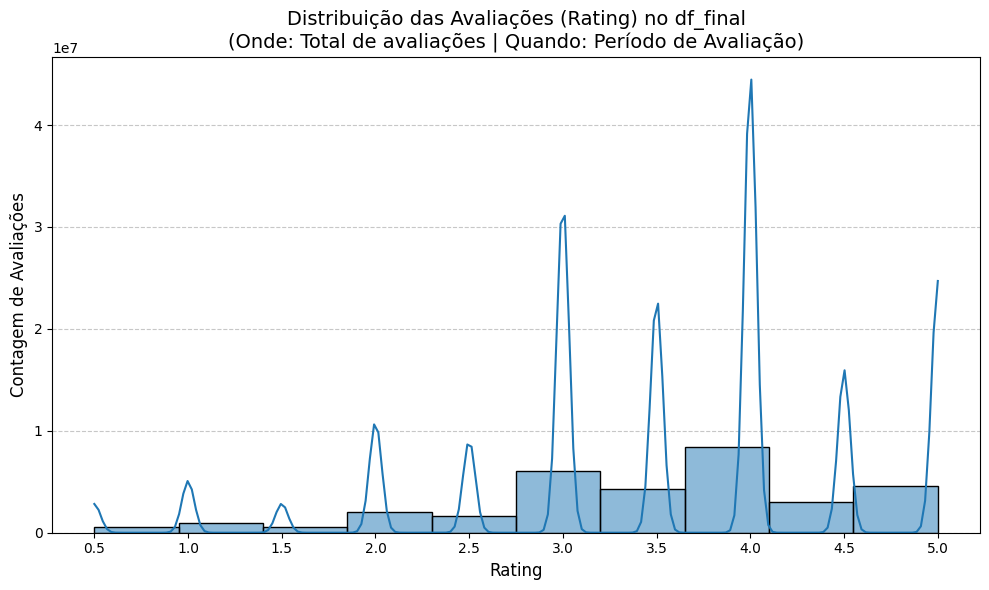

In [ ]:
print("Estatísticas da Avaliação (Rating):")
print(df_final['rating'].describe().to_string())

# Visualização: Distribuição das Avaliações (Rating)
plt.figure(figsize=(10, 6))
sns.histplot(df_final['rating'], bins=10, kde=True, palette='viridis')
plt.title('Distribuição das Avaliações (Rating) no df_final\n(Onde: Total de avaliações | Quando: Período de Avaliação)', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Contagem de Avaliações', fontsize=12)
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\igors\AppData\Local\Temp\ipykernel_22640\2061581242.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.values, y=genres_count.index, palette='Spectral')


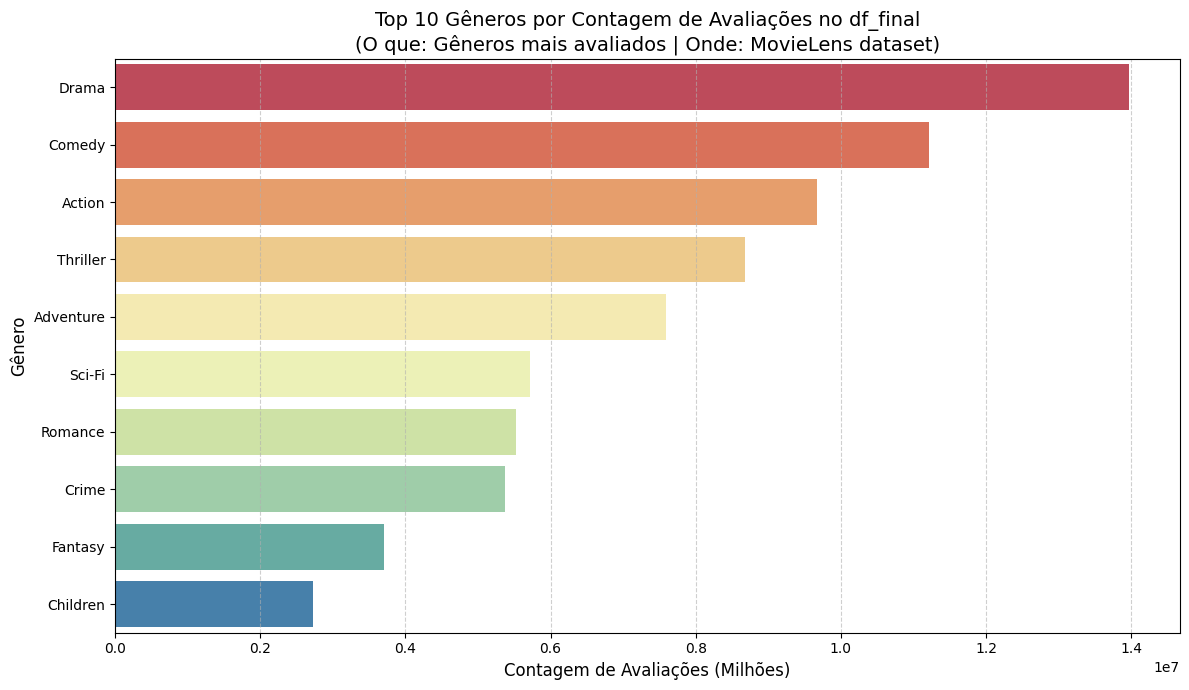

In [ ]:
# Desmembrar e contar gêneros
genres_split = df_final['genres'].str.split('|', expand=True).stack()
genres_count = genres_split.value_counts().head(10)

# Visualização: Top 10 Gêneros por Contagem de Avaliações
plt.figure(figsize=(12, 7))
sns.barplot(x=genres_count.values, y=genres_count.index, palette='Spectral')
plt.title('Top 10 Gêneros por Contagem de Avaliações no df_final\n(O que: Gêneros mais avaliados | Onde: MovieLens dataset)', fontsize=14)
plt.xlabel('Contagem de Avaliações (Milhões)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\igors\AppData\Local\Temp\ipykernel_22640\961816920.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ratings_per_year = df_final.set_index('timestamp').resample('Y').size()


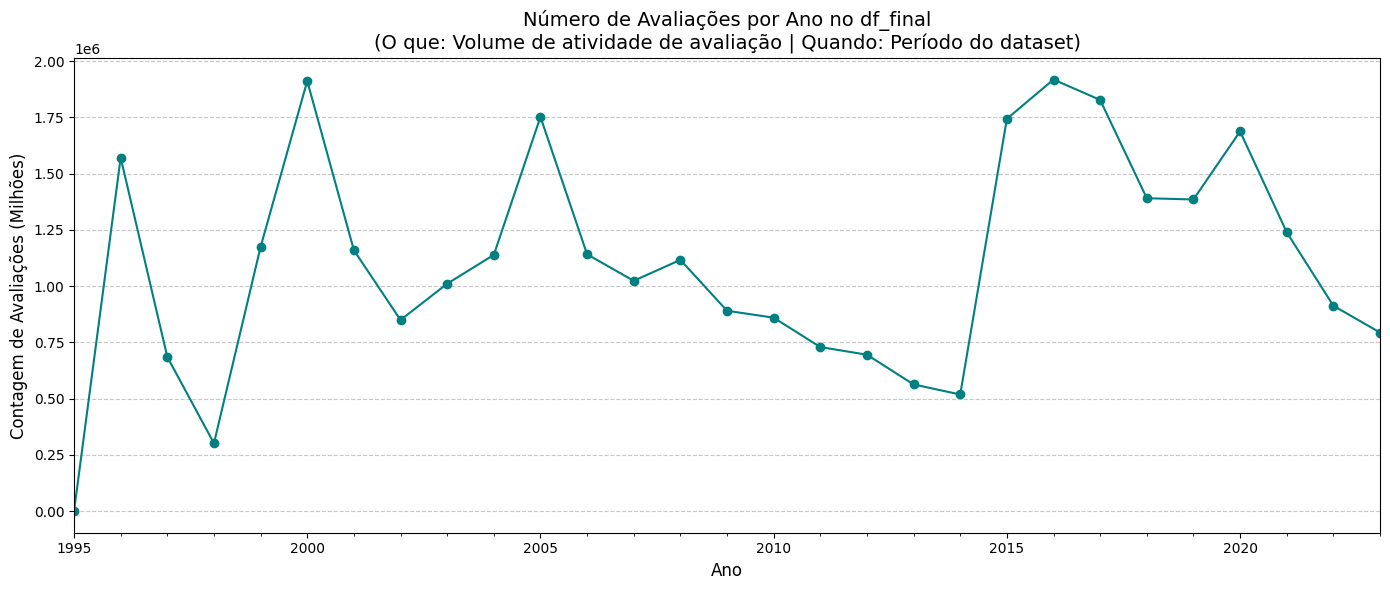

In [ ]:
#  Visualização: Tendência de Avaliações ao Longo do Tempo
ratings_per_year = df_final.set_index('timestamp').resample('Y').size()

plt.figure(figsize=(14, 6))
ratings_per_year.plot(kind='line', marker='o', linestyle='-', color='teal')
plt.title('Número de Avaliações por Ano no df_final\n(O que: Volume de atividade de avaliação | Quando: Período do dataset)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Contagem de Avaliações (Milhões)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

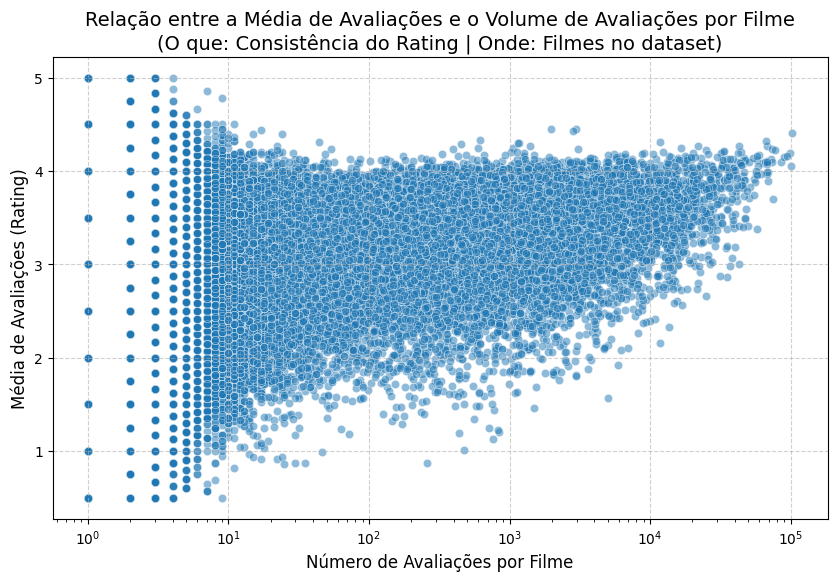

In [ ]:
# Calcular a média de rating e a contagem de ratings por filme
rating_stats = df_final.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
rating_stats.columns = ['movieId', 'avg_rating', 'num_ratings']

# Juntar as estatísticas de volta ao df_final (opcional, mas bom para aprofundamento)
df_corr = pd.merge(df_final, rating_stats, on='movieId', how='left').drop_duplicates(subset=['movieId'])

# --- Visualização: Relação entre Média de Rating e Número de Avaliações ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_ratings', y='avg_rating', data=df_corr, alpha=0.5)
plt.title('Relação entre a Média de Avaliações e o Volume de Avaliações por Filme\n(O que: Consistência do Rating | Onde: Filmes no dataset)', fontsize=14)
plt.xlabel('Número de Avaliações por Filme', fontsize=12)
plt.ylabel('Média de Avaliações (Rating)', fontsize=12)
plt.xscale('log') # Usar escala logarítmica para o eixo X é crucial
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()

Pergunta 1: Qual Gênero Possui a Maior Média de Avaliação?

/tmp/ipython-input-2548792504.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette='RdYlGn')


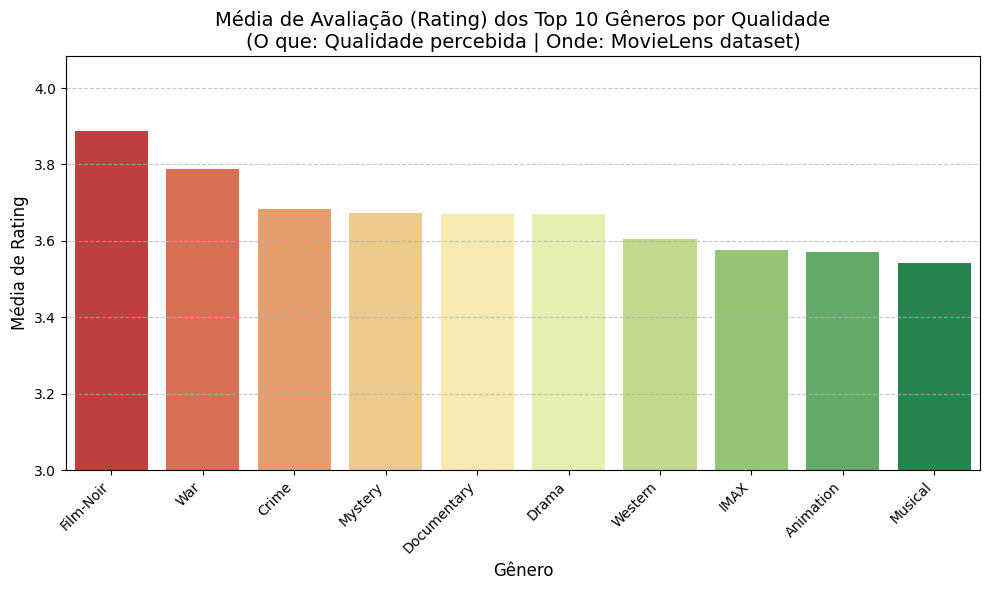

In [6]:
# 1. Calcular a média de rating por gênero
# Usamos a coluna genres_split criada anteriormente para calcular a média
genre_rating_mean = df_final.copy()
genre_rating_mean['genre_list'] = genre_rating_mean['genres'].str.split('|')
genre_rating_mean_exploded = genre_rating_mean.explode('genre_list')
avg_rating_by_genre = genre_rating_mean_exploded.groupby('genre_list')['rating'].mean().sort_values(ascending=False).head(10)

# --- Visualização: Média de Rating por Gênero ---
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette='RdYlGn')
plt.title('Média de Avaliação (Rating) dos Top 10 Gêneros por Qualidade\n(O que: Qualidade percebida | Onde: MovieLens dataset)', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Média de Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(3.0, avg_rating_by_genre.max() * 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pergunta 2: Como a Média de Avaliação (Rating) Evoluiu ao Longo do Tempo?

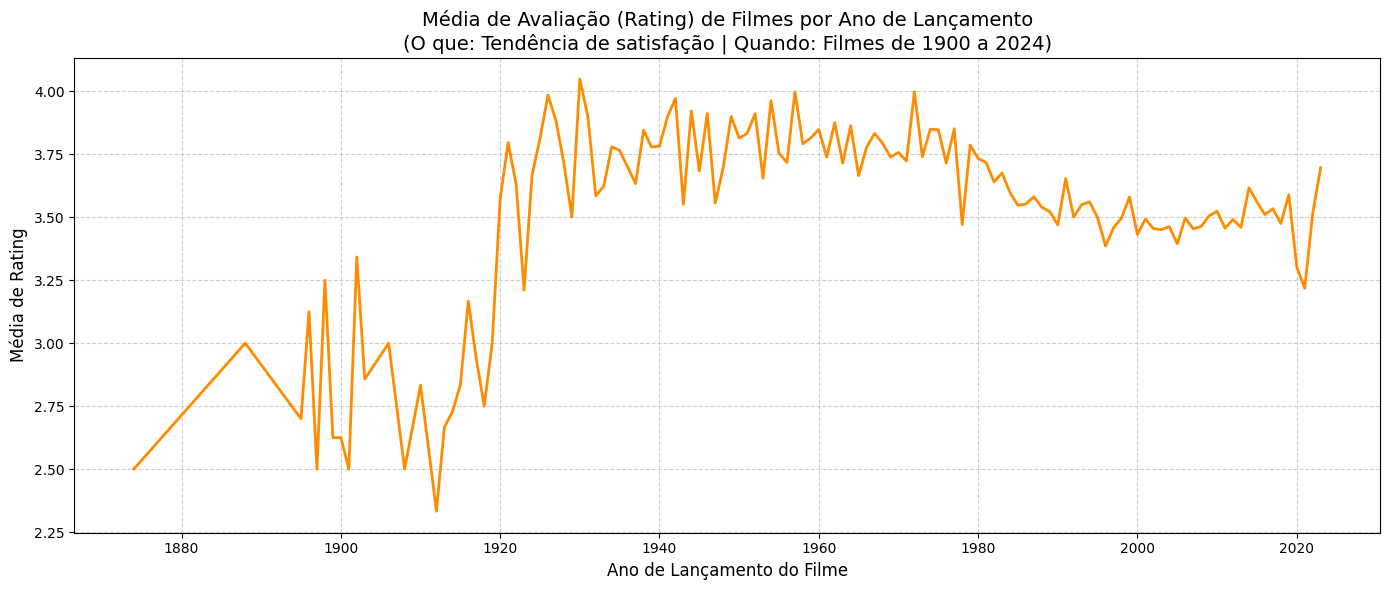

In [7]:
# 2. Calcular a média de rating por ano de publicação (precisa extrair o ano do title)
# Função para extrair o ano
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    return int(match.group(1)) if match else None

movies['release_year'] = movies['title'].apply(extract_year)
df_merged_year = pd.merge(df_final, movies[['movieId', 'release_year']], on='movieId', how='left')

# Calcular a média de rating por ano de lançamento
avg_rating_by_release_year = df_merged_year.groupby('release_year')['rating'].mean().dropna()

# --- Visualização: Média de Rating por Ano de Lançamento ---
plt.figure(figsize=(14, 6))
avg_rating_by_release_year.plot(kind='line', color='darkorange', linewidth=2)
plt.title('Média de Avaliação (Rating) de Filmes por Ano de Lançamento\n(O que: Tendência de satisfação | Quando: Filmes de 1900 a 2024)', fontsize=14)
plt.xlabel('Ano de Lançamento do Filme', fontsize=12)
plt.ylabel('Média de Rating', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Pergunta 3: Qual é o Filme Mais Votado (Popular) e o Filme com Melhor Classificação (Qualidade)?

In [ ]:
# 3. Utilizando o DataFrame df_corr (criado em 1.4)
top_popular = df_corr.sort_values(by='num_ratings', ascending=False).head(5)

# Filtrar por filmes com no mínimo 50 avaliações (para garantir qualidade mínima)
min_ratings = df_corr['num_ratings'].quantile(0.9) # Ex: top 10% em popularidade
top_rated = df_corr[df_corr['num_ratings'] >= min_ratings].sort_values(by='avg_rating', ascending=False).head(5)

print("\nTop 5 Filmes Mais Populares (por contagem de avaliações):\n", top_popular[['title', 'num_ratings', 'avg_rating']])
print("\nTop 5 Filmes Mais Bem Avaliados (acima de X avaliações):\n", top_rated[['title', 'num_ratings', 'avg_rating']])

# Não precisa de visualização complexa, o output de texto já responde.


Top 5 Filmes Mais Populares (por contagem de avaliações):
                                      title  num_ratings  avg_rating
2465018   Shawshank Redemption, The (1994)       102929    4.404614
2852303                Forrest Gump (1994)       100296    4.052744
2234536                Pulp Fiction (1994)        98409    4.196969
13310382                Matrix, The (1999)        93808    4.156437
4640805   Silence of the Lambs, The (1991)        90330    4.148367

Top 5 Filmes Mais Bem Avaliados (acima de X avaliações):
                                      title  num_ratings  avg_rating
30944870            Planet Earth II (2016)         1956    4.446830
30614953               Planet Earth (2006)         2948    4.444369
30931623           Band of Brothers (2001)         2811    4.426539
2465018   Shawshank Redemption, The (1994)       102929    4.404614
30951003                            Cosmos          615    4.330081


Pergunta 4: Qual a Distribuição de Avaliações Dadas Pelos Usuários no Top 10 Mais Ativos?

/tmp/ipython-input-4246171721.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='userId', y='rating', data=df_top_users, inner='quartile', palette='hls')


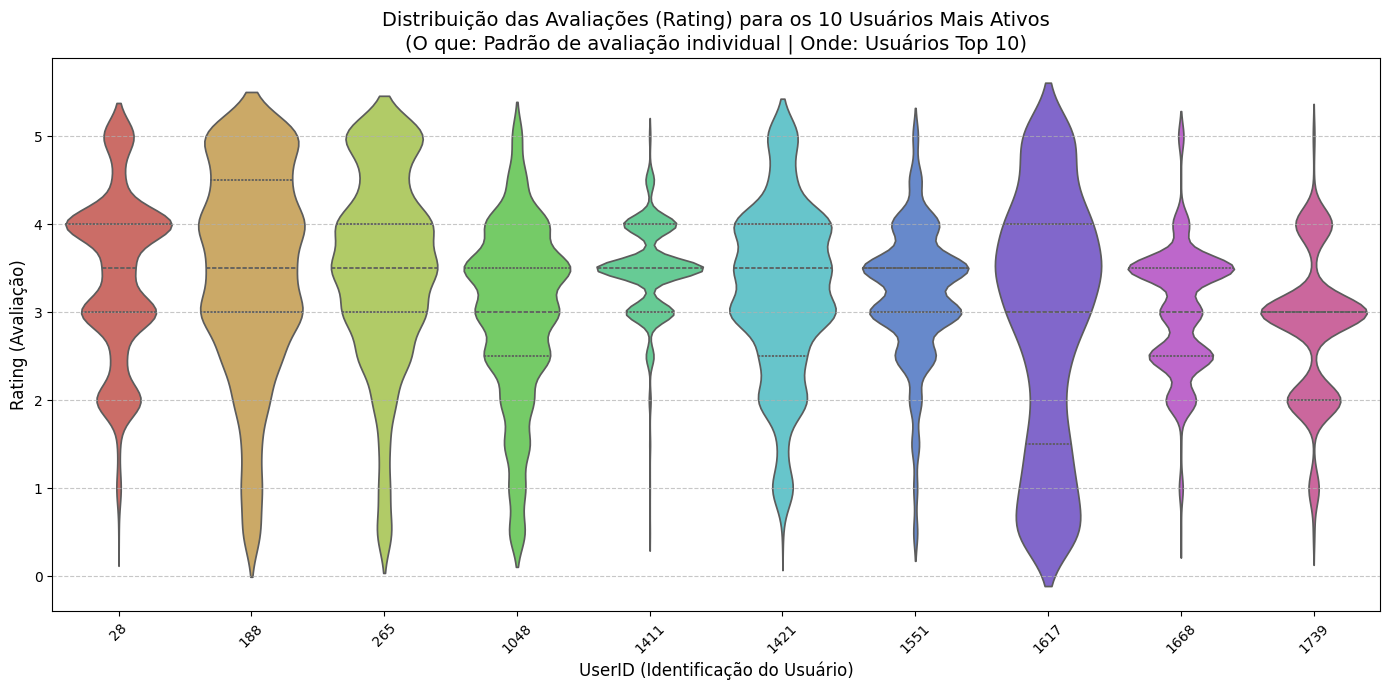

In [8]:
# 4. Top 10 usuários mais ativos
top_users = df_final['userId'].value_counts().head(10).index
df_top_users = df_final[df_final['userId'].isin(top_users)]

# --- Visualização: Distribuição de Rating por Usuário Ativo ---
plt.figure(figsize=(14, 7))
sns.violinplot(x='userId', y='rating', data=df_top_users, inner='quartile', palette='hls')
plt.title('Distribuição das Avaliações (Rating) para os 10 Usuários Mais Ativos\n(O que: Padrão de avaliação individual | Onde: Usuários Top 10)', fontsize=14)
plt.xlabel('UserID (Identificação do Usuário)', fontsize=12)
plt.ylabel('Rating (Avaliação)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pergunta 5: Onde Estão Concentrados os Valores Faltantes (tmdbId) e Qual o Impacto no Gênero?

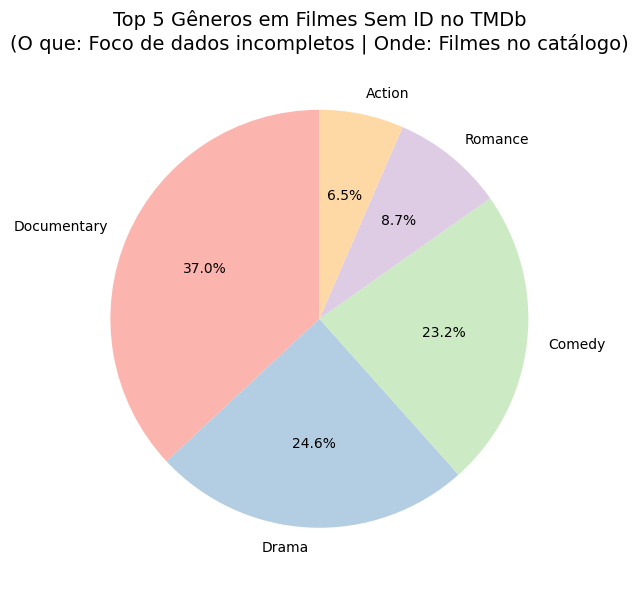

In [9]:
# 5. Análise de valores faltantes (usamos info_filmes_completa para ter todos os filmes)
# Selecionar filmes com tmdbId faltante (são os que ficaram com NaN)
missing_tmdbid_movies = info_filmes_completa[info_filmes_completa['tmdbId'].isnull()]

# Contar a frequência de gêneros nesses filmes
missing_genres_split = missing_tmdbid_movies['genres'].str.split('|', expand=True).stack()
missing_genres_count = missing_genres_split.value_counts().head(5)

# --- Visualização: Top 5 Gêneros em Filmes Sem tmdbId ---
plt.figure(figsize=(8, 6))
plt.pie(missing_genres_count, labels=missing_genres_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
plt.title('Top 5 Gêneros em Filmes Sem ID no TMDb\n(O que: Foco de dados incompletos | Onde: Filmes no catálogo)', fontsize=14)
plt.ylabel('') # Remove o label Y do pie chart
plt.tight_layout()
plt.show()

Pergunta 6: Existe um Padrão Temporal para o Uso da Coluna tag?

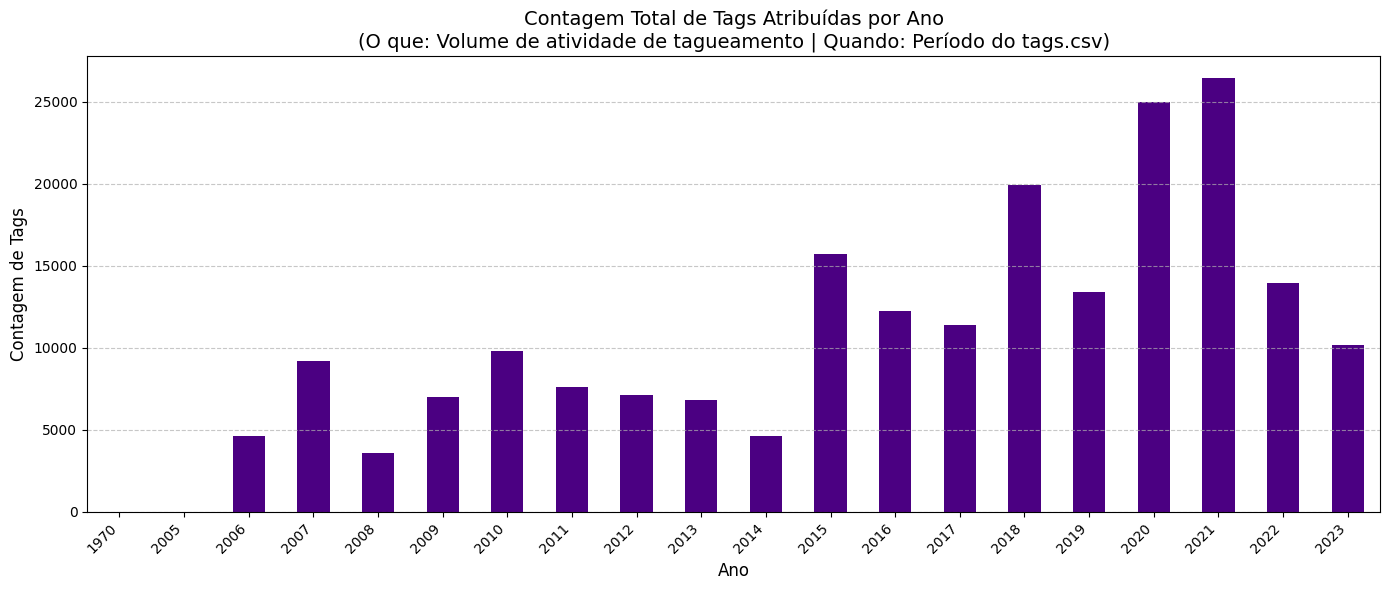

In [10]:
# 6. Análise Temporal de Tags (usamos o tags.csv original)
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')
tags['year'] = tags['timestamp'].dt.year

# Contar o número de tags por ano
tags_per_year = tags.groupby('year').size()

# --- Visualização: Contagem de Tags por Ano ---
plt.figure(figsize=(14, 6))
tags_per_year.plot(kind='bar', color='indigo')
plt.title('Contagem Total de Tags Atribuídas por Ano\n(O que: Volume de atividade de tagueamento | Quando: Período do tags.csv)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Contagem de Tags', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()